# DLPY Image Classification MNIST Fashion

The Modified National Institute of Standards and Technology Fashion (**MNIST Fashion**) data set contains images of clothing from the Zalando company. Approximately 15,000 images have been sampled from the data set to train an image classification model using the image pixels. Each image is a 28x28 grayscale pixel bounding box saved as a separate PNG files. Below are 10 images of each type of clothing. 

![title](mnist_fashion_sample.png)

# Load Packages

In [1]:
import swat
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
swat.options.cas.print_messages = True
import dlpy
from dlpy.images import ImageTable
from dlpy.splitting import two_way_split
from dlpy.splitting import three_way_split
from dlpy import Sequential
from dlpy.model import *
from dlpy.layers import * 
from dlpy.applications import *
from dlpy.model import Solver
from dlpy import utils
from dlpy.model import Optimizer
from dlpy.applications import LeNet5

# Connect to CAS

In [2]:
conn = swat.CAS("server", 30571, "student", "Metadata0")

# Load Images

In [3]:
my_images = ImageTable.load_files(conn=conn, path='/workshop/winsas/VOSI/mnist_fashion', casout=dict(name='fashion'))

In [4]:
conn.table.tableinfo()

,Name,Rows,Columns,IndexedColumns,Encoding,CreateTimeFormatted,ModTimeFormatted,AccessTimeFormatted,JavaCharSet,CreateTime,...,Repeated,View,MultiPart,SourceName,SourceCaslib,Compressed,Creator,Modifier,SourceModTimeFormatted,SourceModTime
0,FASHION,15000,4,0,utf-8,2024-09-06T17:35:50+00:00,2024-09-06T17:35:50+00:00,2024-09-06T17:35:50+00:00,UTF8,2.041263e+09,...,0,0,0,,,0,student,,,NaN


In [5]:
my_images.head()

,_image_,_label_,_filename_0,_id_
0,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,class0,img0.png,1
1,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,class0,img1000.png,5
2,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,class0,img1014.png,20
3,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,class0,img1028.png,35
4,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,class0,img1052.png,62


In [6]:
my_images.columninfo()

,Column,Label,ID,Type,RawLength,FormattedLength,Format,NFL,NFD
0,_image_,,1,varbinary(image),871,871,,0,0
1,_label_,,2,varchar,6,6,,0,0
2,_filename_0,,3,varchar,11,11,,0,0
3,_id_,,4,int64,8,12,,0,0


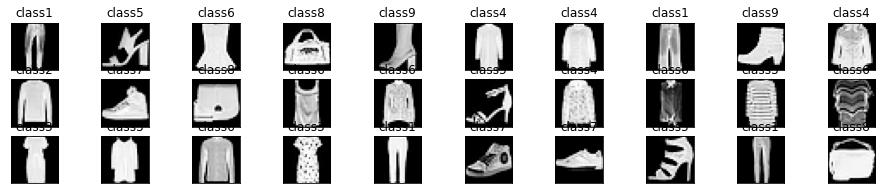

In [7]:
my_images.show(nimages=30, ncol=10, randomize=True)

In [8]:
my_images.label_freq

,Level,Frequency
class0,1,1500
class1,2,1500
class2,3,1500
class3,4,1500
class4,5,1500
class5,6,1500
class6,7,1500
class7,8,1500
class8,9,1500
class9,10,1500


In [9]:
my_images.image_summary

jpg                 15000
minWidth               28
maxWidth               28
minHeight              28
maxHeight              28
meanWidth              28
meanHeight             28
mean1stChannel    72.6275
min1stChannel           0
max1stChannel         255
mean2ndChannel          0
min2ndChannel           0
max2ndChannel           0
mean3rdChannel          0
min3rdChannel           0
max3rdChannel           0
dtype: object

# Shuffle and Partition Data

In [10]:
my_images.shuffle(casout=dict(name='fashion', replace=True))

[caslib]

 'CASUSER(student)'

[tableName]

 'FASHION'

[casTable]

 CASTable('FASHION', caslib='CASUSER(student)')

+ Elapsed: 0.0227s, user: 0.033s, sys: 0.00268s, mem: 37.2mb

In [11]:
train, validate, test = three_way_split(my_images, valid_rate=20, test_rate=20, seed=12345)
len(train), len(validate), len(test)

(9000, 3000, 3000)

# Build Sequential CNN Model

In [12]:
simple_cnn_model = Sequential(conn, model_table='simple_cnn')
simple_cnn_model.add(InputLayer(1,28,28))
simple_cnn_model.add(Conv2d(act='relu', n_filters=10, width=5, height=5, stride=1, init='xavier'))
simple_cnn_model.add(Pooling(width=2, height=2, stride=2, pool='max'))
simple_cnn_model.add(Dense(n=100, act='relu', init='xavier', dropout = 0.4))
simple_cnn_model.add(OutputLayer(n=10, act='softmax'))

NOTE: Input layer added.
NOTE: Convolution layer added.
NOTE: Pooling layer added.
NOTE: Fully-connected layer added.
NOTE: Output layer added.
NOTE: Model compiled successfully.


In [13]:
simple_cnn_model.get_model_info()

,Descr,Value
0,Model Name,simple_cnn
1,Model Type,Convolutional Neural Network
2,Number of Layers,5
3,Number of Input Layers,1
4,Number of Output Layers,1
5,Number of Convolutional Layers,1
6,Number of Pooling Layers,1
7,Number of Fully Connected Layers,1


In [14]:
simple_cnn_model.print_summary()

,Layer Id,Layer,Type,Kernel Size,Stride,Activation,Output Size,Number of Parameters,FLOPS(forward pass)
0,0,Input1,input,,,None,"(28, 28, 1)","(0, 0)",0
1,1,Convo.1,convo,"(5, 5)","(1, 1)",Relu,"(28, 28, 10)","(250, 10)",196000
2,2,Pool1,pool,"(2, 2)","(2, 2)",Max,"(14, 14, 10)","(0, 0)",0
3,3,F.C.1,fc,"(1960, 100)",,Relu,100,"(196000, 0)",196000
4,4,Output1,output,,,Softmax,10,"(1000, 10)",0
5,,,,,,,,Total number of parameters,Total FLOPS
6,Summary,,,,,,,"197,270","392,000"


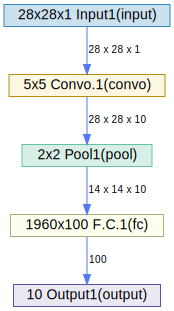

In [15]:
simple_cnn_model.plot_network()

# Train Model

In [16]:
my_solver = AdamSolver(beta1=0.9, beta2=0.999, learning_rate=0.01, learning_rate_policy='step', gamma=0.8, step_size=20)

In [17]:
my_opt = Optimizer(algorithm=my_solver, max_epochs=50, mini_batch_size=64)

In [18]:
simple_cnn_fit_info = simple_cnn_model.fit(data=train, valid_table=validate, target='_label_', inputs='_image_', 
                                log_level=2, train_from_scratch=True, optimizer=my_opt)

NOTE: Training from scratch.


In [19]:
simple_cnn_fit_info['OptIterHistory']

,Epoch,LearningRate,Loss,FitError,ValidLoss,ValidError
0,1,0.0100,13.220395,0.644531,5.484166,0.424333
1,2,0.0100,3.917647,0.437391,1.524570,0.348000
2,3,0.0100,1.775768,0.472005,1.366829,0.449000
3,4,0.0100,1.521245,0.516927,1.176504,0.424667
4,5,0.0100,1.351608,0.477973,1.057675,0.347000
5,6,0.0100,1.226653,0.421115,0.964657,0.313000
6,7,0.0100,1.131305,0.394097,0.882418,0.287333
7,8,0.0100,1.092347,0.373047,0.834263,0.268667
8,9,0.0100,1.026674,0.362088,0.791506,0.253000
9,10,0.0100,0.977670,0.344618,0.759976,0.246667


# Score Test Data

In [20]:
scored_info = simple_cnn_model.evaluate(test, use_best_weights=True)
scored_table = scored_info['OutputCasTables']['Name'][0]
scored_info['ScoreInfo']

,Descr,Value
0,Number of Observations Read,3000
1,Number of Observations Used,3000
2,Misclassification Error (%),15.83333
3,Loss Error,0.50216


# Build Functional CNN Model

In [21]:
input1 = Input(n_channels = 1, width = 28, height = 28)
conv1 = Conv2d(act='relu', n_filters=5, width=4, height=4, stride=1, init='xavier')(input1)

pool1 = Pooling(width=2, height=2, stride=2, pool='min')(conv1)
pool2 = Pooling(width=2, height=2, stride=2, pool='max')(conv1)
pool3 = Pooling(width=2, height=2, stride=2, pool='mean')(conv1)
concat1 = Concat()([pool1, pool2, pool3])

dense1 = Dense(n=50, act='relu', init='xavier', dropout = 0.4)(concat1)
output1 = OutputLayer(n=10, act='softmax')(dense1)

In [22]:
func_cnn_model = Model(conn, inputs=input1, outputs=output1)
func_cnn_model.compile()
func_cnn_model.print_summary()

NOTE: Model compiled successfully.


,Layer Id,Layer,Type,Kernel Size,Stride,Activation,Output Size,Number of Parameters,FLOPS(forward pass)
0,0,InputLayer_1,input,,,None,"(28, 28, 1)","(0, 0)",0
1,1,Conv2d_1,convo,"(4, 4)","(1, 1)",Relu,"(28, 28, 5)","(80, 5)",62720
2,2,Pooling_1,pool,"(2, 2)","(2, 2)",Min,"(14, 14, 5)","(0, 0)",0
3,3,Pooling_2,pool,"(2, 2)","(2, 2)",Max,"(14, 14, 5)","(0, 0)",0
4,4,Pooling_3,pool,"(2, 2)","(2, 2)",Mean,"(14, 14, 5)","(0, 0)",0
5,5,Concat_1,concat,,,Auto,"(14, 14, 15)","(0, 0)",0
6,6,Dense_1,fc,"(2940, 50)",,Relu,50,"(147000, 0)",147000
7,7,OutputLayer_1,output,,,Softmax,10,"(500, 10)",0
8,,,,,,,,Total number of parameters,Total FLOPS
9,Summary,,,,,,,"147,595","209,720"


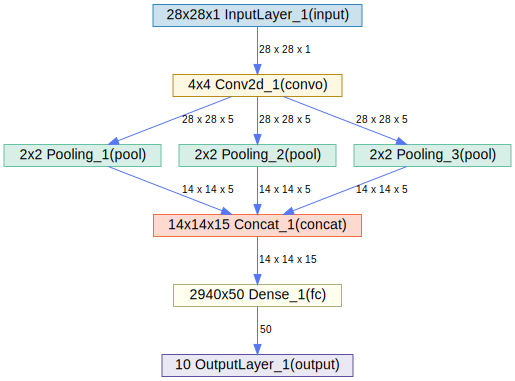

In [23]:
func_cnn_model.plot_network()

# Train Model

In [24]:
my_solver = AdamSolver(beta1=0.9, beta2=0.999, learning_rate=0.01, learning_rate_policy='step', gamma=0.8, step_size=20)

In [25]:
my_opt = Optimizer(algorithm=my_solver, max_epochs=50, mini_batch_size=64)

In [26]:
func_cnn_model_info = func_cnn_model.fit(data=train, valid_table=validate, target='_label_', inputs='_image_', 
                                log_level=2, train_from_scratch=True, optimizer=my_opt)

NOTE: Training from scratch.


In [27]:
func_cnn_model_info['OptIterHistory']

,Epoch,LearningRate,Loss,FitError,ValidLoss,ValidError
0,1,0.0100,14.851036,0.752170,4.138895,0.469333
1,2,0.0100,3.703727,0.767361,2.261957,0.760333
2,3,0.0100,2.294419,0.840603,2.090499,0.834667
3,4,0.0100,2.187443,0.846897,2.038426,0.774000
4,5,0.0100,2.118432,0.816515,1.977173,0.758333
5,6,0.0100,2.085082,0.785590,1.930241,0.712000
6,7,0.0100,2.066254,0.774306,1.891593,0.693667
7,8,0.0100,2.026488,0.762695,1.854889,0.667667
8,9,0.0100,2.029849,0.757378,1.820640,0.658667
9,10,0.0100,1.980566,0.747396,1.792232,0.654000


# Score Test Data

In [28]:
scored_info = func_cnn_model.evaluate(test, use_best_weights=True)
scored_table = scored_info['OutputCasTables']['Name'][0]
scored_info['ScoreInfo']

,Descr,Value
0,Number of Observations Read,3000
1,Number of Observations Used,3000
2,Misclassification Error (%),28.63333
3,Loss Error,0.87378


# Import LeNet5 Model Architecure

In [29]:
lenet5_import = LeNet5(conn, model_table='LENET5', n_classes=10, n_channels=1, width=28, height=28, 
                       scale=0.00392156862745098, random_flip='none', random_crop='none', offsets=0)

NOTE: Input layer added.
NOTE: Convolution layer added.
NOTE: Pooling layer added.
NOTE: Convolution layer added.
NOTE: Pooling layer added.
NOTE: Fully-connected layer added.
NOTE: Fully-connected layer added.
NOTE: Output layer added.
NOTE: Model compiled successfully.


In [30]:
lenet5_import.get_model_info()

,Descr,Value
0,Model Name,lenet5
1,Model Type,Convolutional Neural Network
2,Number of Layers,8
3,Number of Input Layers,1
4,Number of Output Layers,1
5,Number of Convolutional Layers,2
6,Number of Pooling Layers,2
7,Number of Fully Connected Layers,2


In [31]:
lenet5_import.print_summary()

,Layer Id,Layer,Type,Kernel Size,Stride,Activation,Output Size,Number of Parameters,FLOPS(forward pass)
0,0,Input1,input,,,None,"(28, 28, 1)","(0, 0)",0
1,1,Convo.1,convo,"(5, 5)","(1, 1)",Relu,"(28, 28, 6)","(150, 6)",117600
2,2,Pool1,pool,"(2, 2)","(2, 2)",Max,"(14, 14, 6)","(0, 0)",0
3,3,Convo.2,convo,"(5, 5)","(1, 1)",Relu,"(14, 14, 16)","(2400, 16)",470400
4,4,Pool2,pool,"(2, 2)","(2, 2)",Max,"(7, 7, 16)","(0, 0)",0
5,5,F.C.1,fc,"(784, 120)",,Relu,120,"(94080, 0)",94080
6,6,F.C.2,fc,"(120, 84)",,Relu,84,"(10080, 0)",10080
7,7,Output1,output,,,Softmax,10,"(840, 10)",0
8,,,,,,,,Total number of parameters,Total FLOPS
9,Summary,,,,,,,"107,582","692,160"


# Train LeNet5 Model

In [32]:
my_solver = AdamSolver(beta1=0.9, beta2=0.999, learning_rate=0.01, learning_rate_policy='step', gamma=0.8, step_size=20)

In [33]:
my_opt = Optimizer(algorithm=my_solver, max_epochs=50, mini_batch_size=64)

In [34]:
lenet5_fit_info = lenet5_import.fit(data=train, valid_table=validate, target='_label_', inputs='_image_', 
                                    log_level=2, train_from_scratch=True, optimizer=my_opt)

NOTE: Training from scratch.


In [35]:
lenet5_fit_info['OptIterHistory']

,Epoch,LearningRate,Loss,FitError,ValidLoss,ValidError
0,1,0.0100,1.761296,0.622179,1.201329,0.455000
1,2,0.0100,0.943970,0.363498,0.776799,0.298000
2,3,0.0100,0.682108,0.258247,0.592483,0.236333
3,4,0.0100,0.573877,0.218967,0.499312,0.186000
4,5,0.0100,0.504276,0.189019,0.456766,0.171333
5,6,0.0100,0.437964,0.162109,0.436332,0.166667
6,7,0.0100,0.419579,0.153971,0.407390,0.155333
7,8,0.0100,0.371847,0.137804,0.378516,0.143333
8,9,0.0100,0.335036,0.121745,0.400491,0.143333
9,10,0.0100,0.319070,0.118381,0.360368,0.135333


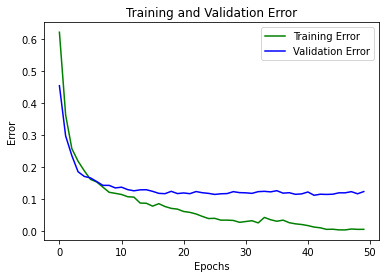

In [36]:
train_error = lenet5_fit_info['OptIterHistory']['FitError']
valid_error = lenet5_fit_info['OptIterHistory']['ValidError']
lenet5_fit_info['OptIterHistory']['ValidError']
epochs = range(50)
plt.plot(epochs, train_error, 'g', label='Training Error')
plt.plot(epochs, valid_error, 'b', label='Validation Error')
plt.title('Training and Validation Error')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.legend()
plt.rcParams["figure.figsize"] = (10,6)
plt.show()

# Score Test Data

In [37]:
scored_info = lenet5_import.evaluate(test, use_best_weights=True)
scored_table = scored_info['OutputCasTables']['Name'][0]
scored_info['ScoreInfo']

,Descr,Value
0,Number of Observations Read,3000
1,Number of Observations Used,3000
2,Misclassification Error (%),11.7
3,Loss Error,0.685918


In [38]:
lenet5_import.valid_conf_mat

,_label_,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10
0,class0,236.0,0.0,6.0,15.0,1.0,0.0,39.0,0.0,3.0,0.0
1,class1,2.0,291.0,0.0,3.0,0.0,0.0,4.0,0.0,0.0,0.0
2,class2,6.0,0.0,240.0,2.0,32.0,0.0,16.0,0.0,4.0,0.0
3,class3,6.0,1.0,5.0,275.0,5.0,0.0,8.0,0.0,0.0,0.0
4,class4,0.0,1.0,19.0,12.0,250.0,0.0,17.0,0.0,1.0,0.0
5,class5,0.0,0.0,0.0,0.0,0.0,292.0,0.0,5.0,0.0,3.0
6,class6,27.0,1.0,26.0,9.0,35.0,1.0,200.0,1.0,0.0,0.0
7,class7,0.0,0.0,0.0,0.0,0.0,7.0,0.0,285.0,0.0,8.0
8,class8,1.0,0.0,2.0,1.0,2.0,0.0,3.0,0.0,291.0,0.0
9,class9,0.0,0.0,0.0,0.0,0.0,2.0,0.0,9.0,0.0,289.0


# Analyze Results Locally

In [39]:
conn.table.fetch(scored_table, to=5)

,_image_,_label_,_filename_0,_id_,P__label_class0,P__label_class1,P__label_class2,P__label_class3,P__label_class4,P__label_class5,P__label_class6,P__label_class7,P__label_class8,P__label_class9,I__label_,_DL_PredP_,_DL_PredLevel_
0,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,class8,img1045.png,12054,1.510063e-05,5.090694e-04,2.766072e-15,1.284018e-09,8.493013e-06,1.089434e-07,1.916340e-06,1.481338e-07,9.994652e-01,7.125300e-09,class8,0.999465,8.0
1,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,class8,img1069.png,12080,5.098338e-21,1.836149e-29,6.127491e-24,1.521242e-26,2.447772e-18,9.428459e-22,8.151208e-25,1.372936e-16,1.000000e+00,1.817349e-20,class8,1.000000,8.0
2,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,class7,img52.png,11469,1.805150e-09,3.525311e-13,2.324856e-12,2.833376e-12,5.720009e-08,2.078061e-08,4.005854e-10,9.995822e-01,3.232929e-09,4.176197e-04,class7,0.999582,7.0
3,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,class7,img844.png,11829,5.921465e-11,2.030235e-14,2.815359e-15,1.756898e-10,2.966155e-09,5.827513e-08,5.243511e-13,9.999907e-01,9.235511e-06,1.085709e-09,class7,0.999991,7.0
4,b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\...,class4,img292.png,6716,1.597953e-08,3.389192e-06,1.021492e-03,7.372522e-04,9.980832e-01,2.459578e-07,1.470332e-04,8.623516e-07,5.349744e-06,1.206810e-06,class4,0.998083,4.0


In [40]:
conn.loadActionSet('simple')
crosstab = conn.simple.crossTab(
    table = scored_table,
    row = '_label_',
    col = 'I__label_'
)['Crosstab']

crosstab = crosstab.drop('_label_',1)

NOTE: Added action set 'simple'.


In [41]:
correct = pd.DataFrame(np.diagonal(crosstab)) / pd.DataFrame(crosstab.sum(axis=1))
miss = 1-correct
classes = pd.DataFrame(['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot'])

df = pd.concat([classes, correct, miss], axis=1)
df.columns = ['Label','Correct','Misclassified']
df

,Label,Correct,Misclassified
0,T-shirt/Top,0.786667,0.213333
1,Trouser,0.970000,0.030000
2,Pullover,0.800000,0.200000
3,Dress,0.916667,0.083333
4,Coat,0.833333,0.166667
5,Sandal,0.973333,0.026667
6,Shirt,0.666667,0.333333
7,Sneaker,0.950000,0.050000
8,Bag,0.970000,0.030000
9,Ankle Boot,0.963333,0.036667


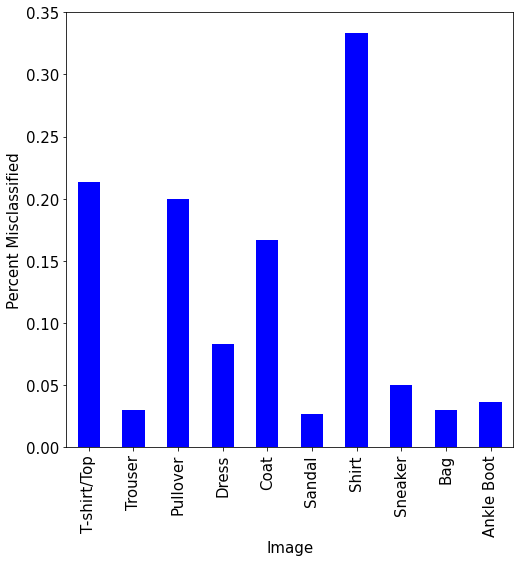

In [42]:
MisPlot = df.plot(x='Label', y='Misclassified', kind='bar', figsize=(8,8), fontsize=15, color='blue')
MisPlot.set_xlabel('Image', fontsize=15)
MisPlot.set_ylabel('Percent Misclassified', fontsize=15)
MisPlot.legend_.remove()
plt.show()

# Deploy

In [43]:
lenet5_import.deploy(path='/workshop/winsas/VOSI', output_format='table')

NOTE: Model table saved successfully.


# End the Session

In [44]:
conn.session.endSession()

+ Elapsed: 0.000182s, user: 0.000157s, sys: 4e-06s, mem: 0.207mb

# DLPY Resources

[Syntax Arguments](https://sassoftware.github.io/python-dlpy/api.html)

[Source Code](https://github.com/sassoftware/python-dlpy/tree/master/dlpy)

[General Documentation](https://go.documentation.sas.com/?docsetId=casdlpg&docsetTarget=n0rkb1a1p6r6kpn141f6yxzfaawj.htm&docsetVersion=8.4&locale=en)

[Youtube Video](https://www.youtube.com/watch?v=RJ0gbsB7d_8&start=125)

[Github](https://github.com/sassoftware/python-dlpy)

[Examples](https://github.com/sassoftware/python-dlpy/tree/master/examples)

[Model Zip Files](https://support.sas.com/documentation/prod-p/vdmml/zip/)